### Load Dependencies and Dataset

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

100%|██████████| 1.56k/1.56k [00:00<00:00, 803kB/s]

Extracting files...
Path to dataset files: C:\Users\Admin_XOXO\.cache\kagglehub\datasets\shwetabh123\mall-customers\versions\1


In [ ]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Admin_XOXO\.cache\kagglehub\datasets\shwetabh123\mall-customers\versions\1\mall_customers.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (200, 5)

First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
# Check dataset information
print("Dataset Info:")
df.info()
print("\nDescriptive Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Step 2: Data Preprocessing and Scaling

In [12]:
# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=['Income_Scaled', 'Spending_Score_Scaled'])
print("Scaled Features Statistics:")
print(X_scaled_df.describe())

Scaled Features Statistics:
       Income_Scaled  Spending_Score_Scaled
count   2.000000e+02           2.000000e+02
mean   -2.131628e-16          -1.465494e-16
std     1.002509e+00           1.002509e+00
min    -1.738999e+00          -1.910021e+00
25%    -7.275093e-01          -5.997931e-01
50%     3.587926e-02          -7.764312e-03
75%     6.656748e-01           8.851316e-01
max     2.917671e+00           1.894492e+00


### Step 3: Visual Exploration - Before Clustering

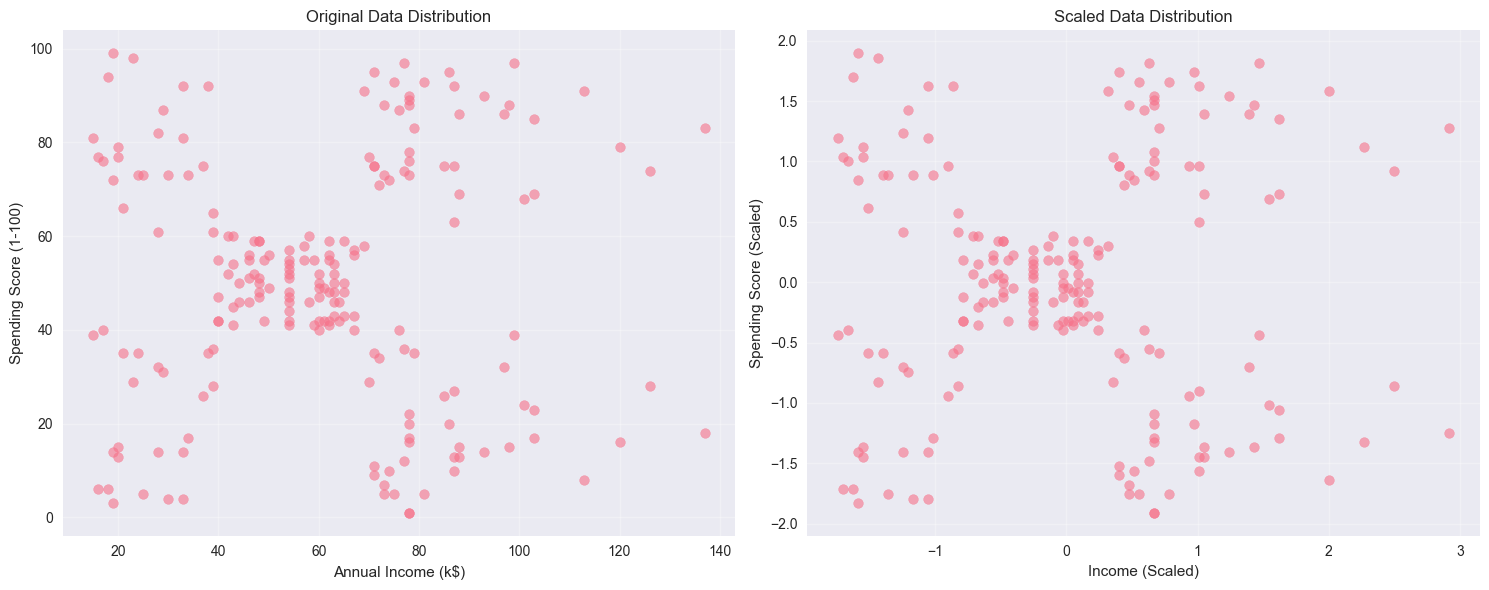

In [15]:
# Create subplots for visual exploration
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original data distribution
axes[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6)
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].set_title('Original Data Distribution')
axes[0].grid(True, alpha=0.3)

# Scaled data distribution
axes[1].scatter(X_scaled_df['Income_Scaled'], X_scaled_df['Spending_Score_Scaled'], alpha=0.6)
axes[1].set_xlabel('Income (Scaled)')
axes[1].set_ylabel('Spending Score (Scaled)')
axes[1].set_title('Scaled Data Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 4: Determine Optimal Number of Clusters

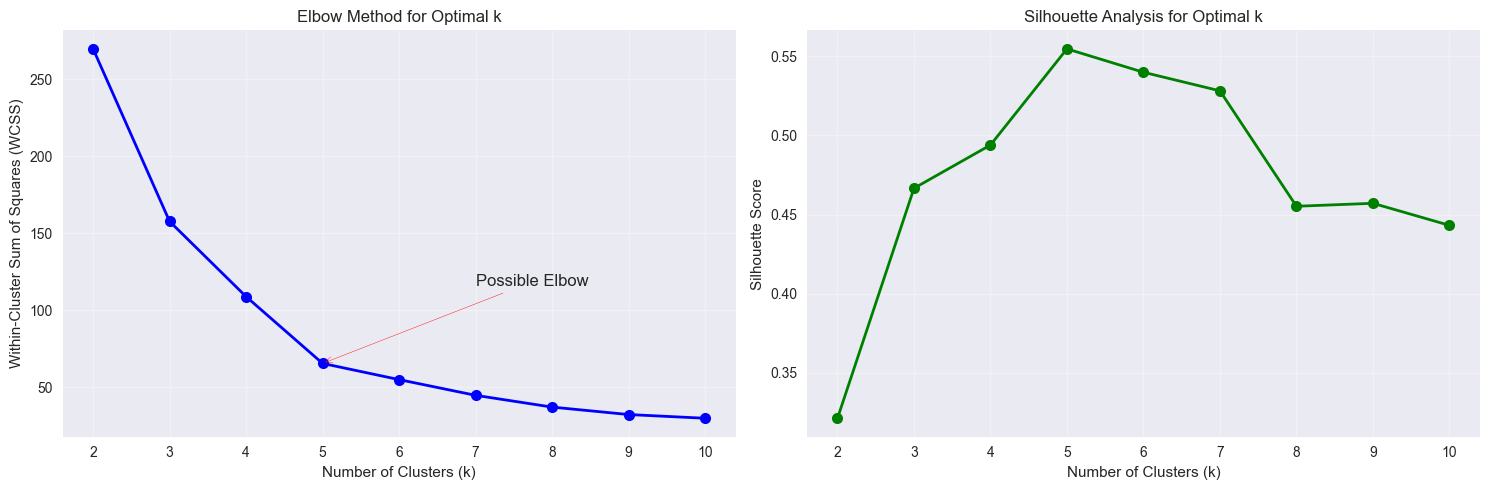

In [16]:
# Method 1: Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

# Add annotations for elbow point
plt.annotate('Possible Elbow', xy=(5, wcss[3]), xytext=(7, wcss[3] + 50),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=12)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 5: Apply K-Means Clustering with Optimal k

In [17]:
# Based on elbow method and silhouette score, let's choose k=5
optimal_k = 5

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters
X_scaled_df['Cluster'] = clusters

print(f"K-Means clustering completed with {optimal_k} clusters")
print("\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

K-Means clustering completed with 5 clusters

Cluster distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


### Step 6: Visualize the Clusters

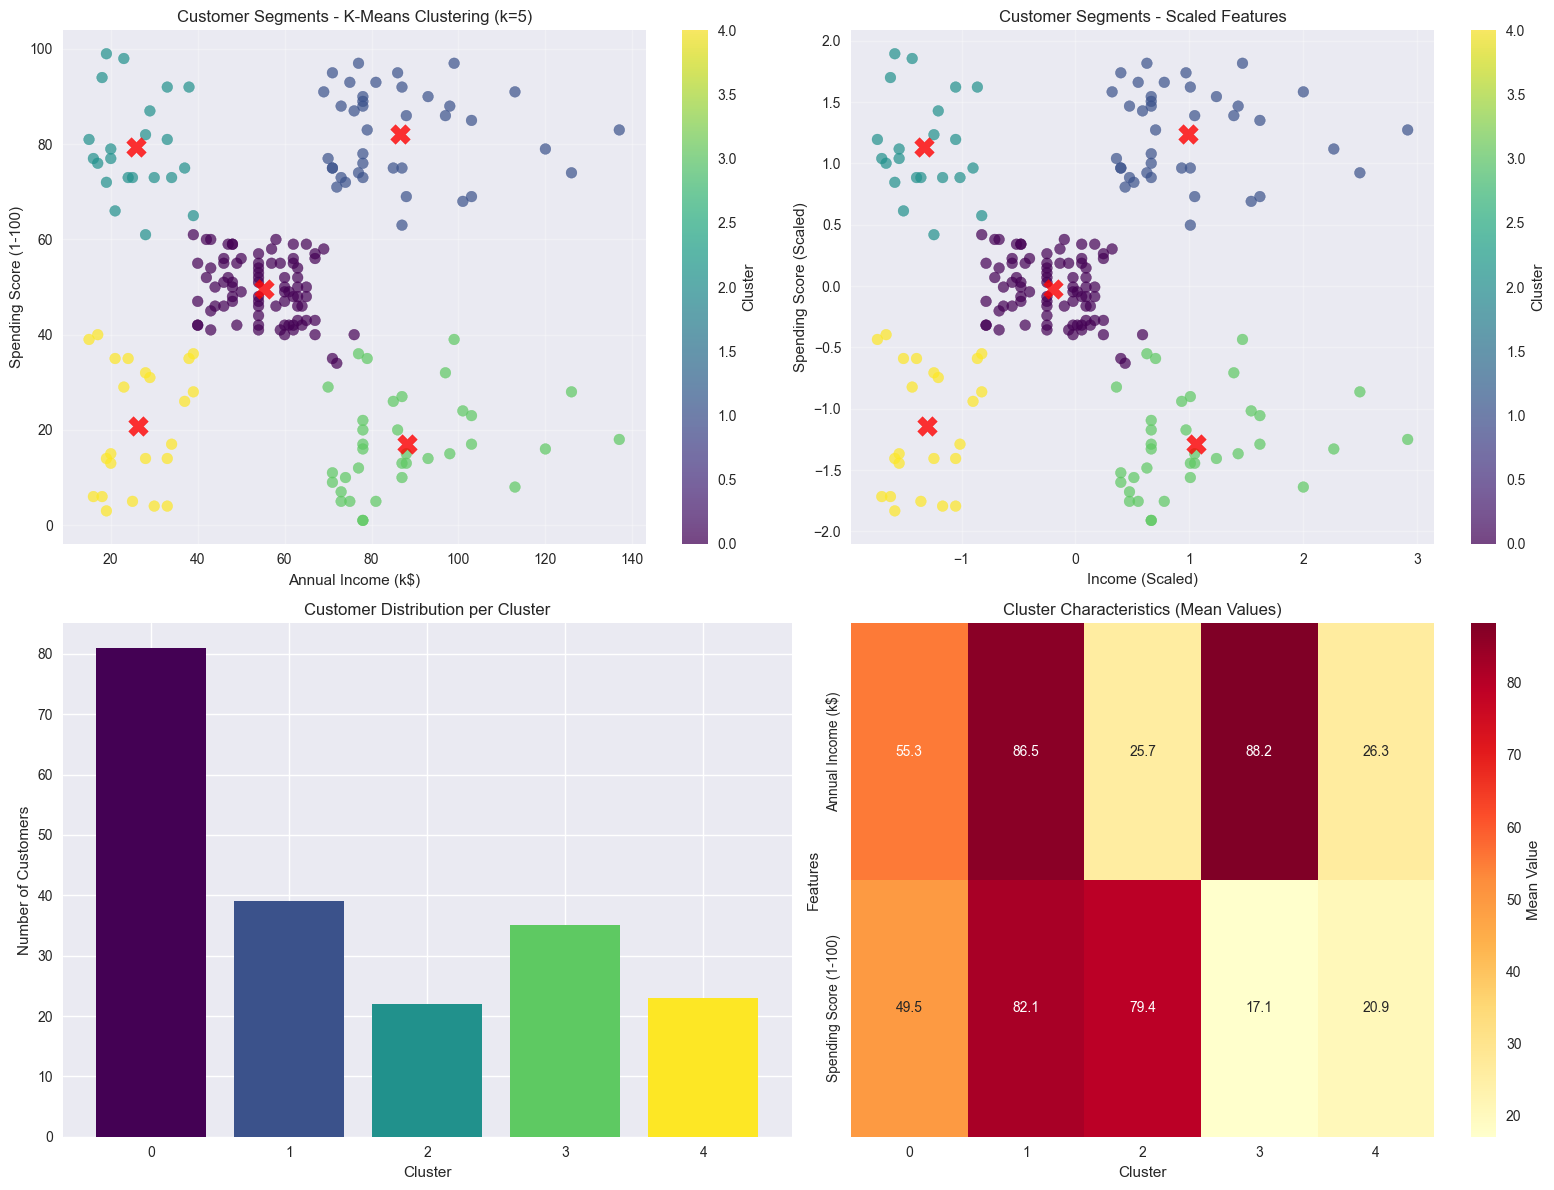

In [18]:
# Create detailed visualization
plt.figure(figsize=(16, 12))

# Plot 1: Original data with clusters
plt.subplot(2, 2, 1)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster'], cmap='viridis', alpha=0.7, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments - K-Means Clustering (k=5)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

# Plot cluster centers in original scale
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers_original[:, 0], centers_original[:, 1], c='red', marker='X', s=200, alpha=0.8)

# Plot 2: Scaled data with clusters
plt.subplot(2, 2, 2)
scatter_scaled = plt.scatter(X_scaled_df['Income_Scaled'], X_scaled_df['Spending_Score_Scaled'], 
                            c=X_scaled_df['Cluster'], cmap='viridis', alpha=0.7, s=60)
plt.xlabel('Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Customer Segments - Scaled Features')
plt.colorbar(scatter_scaled, label='Cluster')
plt.grid(True, alpha=0.3)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, alpha=0.8)

# Plot 3: Cluster distribution
plt.subplot(2, 2, 3)
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=plt.cm.viridis(np.linspace(0, 1, optimal_k)))
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution per Cluster')
plt.xticks(cluster_counts.index)

# Plot 4: Cluster characteristics
plt.subplot(2, 2, 4)
cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Create a heatmap of cluster characteristics
sns.heatmap(cluster_means.T, annot=True, cmap='YlOrRd', fmt='.1f', cbar_kws={'label': 'Mean Value'})
plt.title('Cluster Characteristics (Mean Values)')
plt.ylabel('Features')
plt.xlabel('Cluster')

plt.tight_layout()
plt.show()

### Step 7: Detailed Cluster Analysis

In [19]:
# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)

cluster_analysis.columns = ['Income_Mean', 'Income_Std', 'Income_Min', 'Income_Max',
                           'Spending_Mean', 'Spending_Std', 'Spending_Min', 'Spending_Max',
                           'Customer_Count']

print("Detailed Cluster Analysis:")
print(cluster_analysis)

Detailed Cluster Analysis:
         Income_Mean  Income_Std  Income_Min  Income_Max  Spending_Mean  \
Cluster                                                                   
0              55.30        8.99          39          76          49.52   
1              86.54       16.31          69         137          82.13   
2              25.73        7.57          15          39          79.36   
3              88.20       16.40          70         137          17.11   
4              26.30        7.89          15          39          20.91   

         Spending_Std  Spending_Min  Spending_Max  Customer_Count  
Cluster                                                            
0                6.53            34            61              81  
1                9.36            63            97              39  
2               10.50            61            99              22  
3                9.95             1            39              35  
4               13.02             3    

In [20]:
# Create customer segment profiles
segment_profiles = []
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    
    profile = {
        'Segment': cluster,
        'Customers_Count': len(cluster_data),
        'Percentage': f"{(len(cluster_data)/len(df)*100):.1f}%",
        'Avg_Income': f"{cluster_data['Annual Income (k$)'].mean():.1f}k$",
        'Avg_Spending_Score': f"{cluster_data['Spending Score (1-100)'].mean():.1f}",
        'Income_Range': f"{cluster_data['Annual Income (k$)'].min():.0f}-{cluster_data['Annual Income (k$)'].max():.0f}k$",
        'Spending_Range': f"{cluster_data['Spending Score (1-100)'].min():.0f}-{cluster_data['Spending Score (1-100)'].max():.0f}"
    }
    segment_profiles.append(profile)

profiles_df = pd.DataFrame(segment_profiles)
print("\nCustomer Segment Profiles:")
print(profiles_df.to_string(index=False))


Customer Segment Profiles:
 Segment  Customers_Count Percentage Avg_Income Avg_Spending_Score Income_Range Spending_Range
       0               81      40.5%     55.3k$               49.5      39-76k$          34-61
       1               39      19.5%     86.5k$               82.1     69-137k$          63-97
       2               22      11.0%     25.7k$               79.4      15-39k$          61-99
       3               35      17.5%     88.2k$               17.1     70-137k$           1-39
       4               23      11.5%     26.3k$               20.9      15-39k$           3-40


### Step 8: Final Visualization with Segment Interpretation

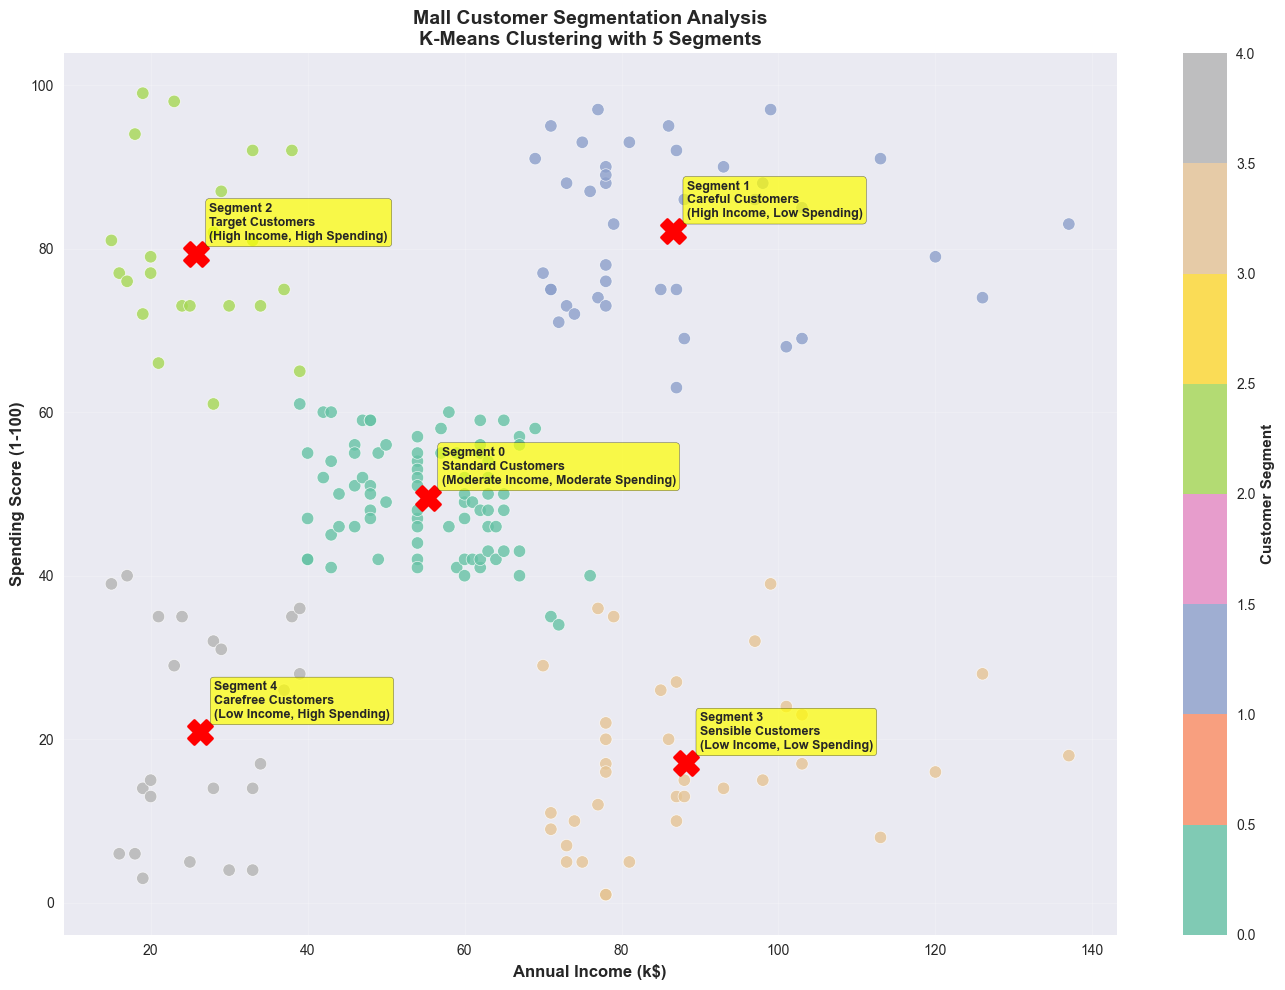

In [21]:
# Create a comprehensive final plot
plt.figure(figsize=(14, 10))

# Main scatter plot with enhanced styling
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster'], cmap='Set2', alpha=0.8, s=80, edgecolors='white', linewidth=0.5)

# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=300, alpha=1.0, linewidth=2)

# Add segment labels and interpretations
segment_labels = {
    0: "Standard Customers\n(Moderate Income, Moderate Spending)",
    1: "Careful Customers\n(High Income, Low Spending)",
    2: "Target Customers\n(High Income, High Spending)",
    3: "Sensible Customers\n(Low Income, Low Spending)",
    4: "Carefree Customers\n(Low Income, High Spending)"
}

# Add annotations for each cluster center
for i, (x, y) in enumerate(centers):
    plt.annotate(f'Segment {i}\n{segment_labels[i]}', 
                xy=(x, y), xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9, fontweight='bold')

plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
plt.title('Mall Customer Segmentation Analysis\nK-Means Clustering with 5 Segments', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.2)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Customer Segment', fontweight='bold')

plt.tight_layout()
plt.show()